# Reproduce: Johansson et al., PRA 87 043804 (2013)

J. R. Johansson, http://jrjohansson.github.com, <robert@riken.jp>

In [1]:
from sympy import *
init_printing()

In [2]:
# Note: This notebook requires and experimental branch of sympy available at: https://github.com/jrjohansson/sympy
from sympy.physics.quantum import *

## Introduction

In this notebook I reproduce some results from Johansson et al., PRA 87, 043804 (2013), which is one of my own papers. Normally this would not qualify as a reproduced results, but in this case I will use a different method to obtain the same result. Here I will use SymPy and its quantum physics module to demonstrate how an analytical result can be obtained using symbolic operator manipulation, instead of calculations with pen and paper.

Here we are interested in evaluating the nonclassicality indicator [see, e.g., Miranowicz et al. Phys. Rev. A 82, 013824 (2010)]

$$
\langle: f^\dagger f :\rangle
$$

which is positive for classical states, and where $f$ is a function of the field operator $b$. We will use the following choise of $f$, which is ideally suited for detecting the presence of nonclassial two-mode squeezing (nonclassical quadrature correlations between photons at difference frequencies):


$$
f = e^{i\theta} b_- + e^{-i\theta} b_-^\dagger + i(e^{i\theta} b_+ - e^{-i\theta} b_+^\dagger )
$$

where $b_\pm$ are the field operators at frequencies $\omega_\pm = \omega_d/2 \pm \delta\omega$. Note that the structure of $f$ is $f = x_- - p_+$ where $x_\pm$ and $p_\pm$ are the $x$ and $p$ quadrature operators of modes with frequency $\omega_\pm$, which suggest that this form is suitable for two-mode quadrature squeezing where exactly this operator combination is squeezed below its vacuum level.

Below we will evaluate $\langle: f^\dagger f :\rangle$ for the state of the field $b$ that is produced by the dynamical Casimir effect when the boundary condition of the field is varied in time. The relation between the output field $b$ and the input field $a$ (that impinges on the time-varying boundary condition) is, in the perturbative regime, given as

$$
b_{\pm} = -a_{\pm} - i\frac{\delta\!L_{\rm eff}}{v}\sqrt{\omega_-\omega_+} a_{\mp}^\dagger
$$

Here $\frac{\delta\!L_{\rm eff}}{v}\sqrt{\omega_-\omega_+}$ is a small parameter in the perturbation calculation, which we for brievity will denote $x$ in the following (see PRA 87 043804 for details).

We start by defining symbols and operators:

In [3]:
theta = Symbol("theta", real=True)
x = Symbol("x", real=True)

In [4]:
dL, v, wp, wm = symbols("{\delta\!L}, v, omega_-, omega_+")

In [5]:
# input field operators
am = BosonOperator("a_-")
ap = BosonOperator("a_+")

In [6]:
# output field operators
bm = BosonOperator("b_-")
bp = BosonOperator("b_+")

In [7]:
# relation between input field operators and output field operators
bm_sub = -am - 1j * x * Dagger(ap)
bp_sub = -ap - 1j * x * Dagger(am)

bmd_sub = Dagger(bm_sub)
bpd_sub = Dagger(bp_sub)

$$
f = e^{i\theta} b_- + e^{-i\theta} b_-^\dagger + i(e^{i\theta} b_+ - e^{-i\theta} b_+^\dagger )
$$

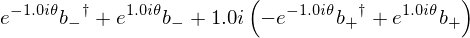

In [8]:
f = exp(1j*theta) * bm + exp(-1j*theta) * Dagger(bm) + 1j * (exp(1j*theta) * bp - exp(-1j*theta) * Dagger(bp))

f

Now we construct $f^\dagger f$

In [9]:
fdf = Dagger(f) * f

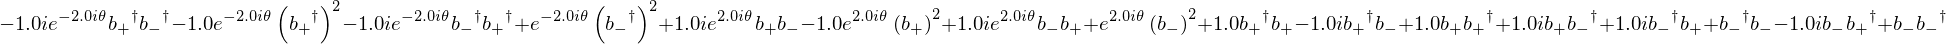

In [10]:
fdf.expand()

Now we calculate the normal order expression $:f^\dagger f:$, with respect to the operators in the output field ($b_\pm$)

In [11]:
fdf_normal = normal_order(fdf.expand())

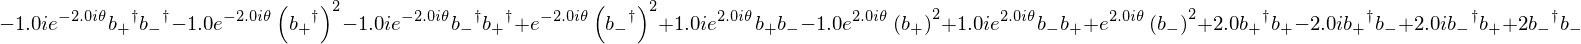

In [12]:
fdf_normal

Now substitute the output field operators with the input field operators:

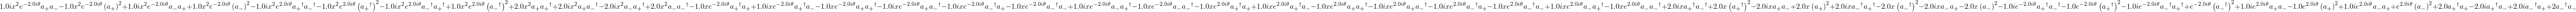

In [13]:
fdf_1 = fdf_normal.expand().subs({bm: bm_sub, Dagger(bm): bmd_sub, bp: bp_sub, Dagger(bp): bpd_sub}).expand()

fdf_1

Write all input operators in normal ordered form:

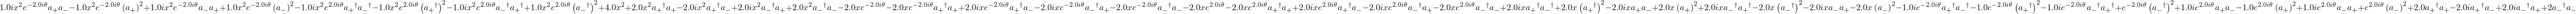

In [14]:
fdf_2 = normal_ordered_form(fdf_1.expand(), independent=True)

fdf_2

### Assume thermal input field

Elimitate operators that do not contribute to expectation values assuming thermal input field. The only operators that contribute are $a_-^\dagger a_-$ and $a_+^\dagger a_+$, and expressions such as for example $\langle a_-a_-\rangle = 0$.

In [15]:
# assume thermal input: first remove nonthermal operator combinations
fdf_3 = fdf_2.subs({am**2: 0, ap**2: 0,
                    ap*am: 0, am*ap: 0, 
                    Dagger(ap) * am: 0, Dagger(am) * ap: 0, 
                    Dagger(ap) * Dagger(am): 0, Dagger(am) * Dagger(ap): 0, 
                    Dagger(ap)**2: 0, 
                    Dagger(am)**2: 0})

fdf_3

Now replace the operators that do contibute with their expectation values:

$$
\langle a_-^\dagger a_-\rangle = n_{\rm th}^-
$$

$$
\langle a_+^\dagger a_+\rangle = n_{\rm th}^+
$$

In [16]:
n_th_m, n_th_p = symbols("{n^-_{th}}, {n^+_{th}}", positive=True)

In [17]:
# thermal operator combinations 
fdf_4 = fdf_3.subs({Dagger(am) * am: n_th_m, Dagger(ap) * ap: n_th_p})

fdf_4

Replace $e^{\pm i\theta}$ with trigonometric expressions, and simplify the expression:

In [18]:
fdf_5 = fdf_4.collect(x).replace(exp(2j*theta), cos(2*theta) + 1j * sin(2*theta)).\
                         replace(exp(-2j*theta), cos(2*theta) - 1j * sin(2*theta))
    
fdf_6 = fdf_5.simplify().collect(cos(2*theta)).collect(x).simplify()

fdf_6

Drop the $x^2$ term because our relation between the output field and input field is only valid to first order in $x$:

In [19]:
fdf_7 = fdf_6.subs(x**2, 0)

fdf_7

Substitute the small parameter $x$ with the physical parameters it represents:

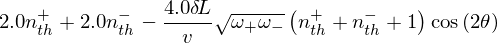

In [20]:
fdf_8 = fdf_7.subs(x**2, 0).subs(x, dL/v * sqrt(wp * wm))

fdf_8

This is equation 14 in Phys. Rev. A 87, 043804 (2013).

The interesting regime is when this expression is negative, because it indicates that there are nonclassical correlations between the quadrature at the different frequencies $\omega_\pm$. It is clear that $\theta = 0$ minimizes the expression, and that for finite temperature the expression is initially positive (the prefactor to the other term is small). We can find the transition point from positive to negative by solving $\langle:f^\dagger f:\rangle = 0$ for $x = \frac{\delta\!L_{\rm eff}}{v}\sqrt{\omega_-\omega_+}$:

In [21]:
# switch back to using x as small paramter, and set theta = 0
fdf_9 = fdf_8.subs(dL/v * sqrt(wp*wm), x).subs(theta, 0)

fdf_9

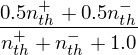

In [22]:
fdf_neg = solve(fdf_9, x)[0]

fdf_neg

Which in the low tempeature case ($n_{\rm th}^+ + n_{\rm th}^- \ll 1$)  simply gives

$$
\frac{\delta\!L_{\rm eff}}{v}\sqrt{\omega_-\omega_+} > \sim (n_{\rm th}^+ + n_{\rm th}^-)/2
$$

as a condition for when the output field becomes nonclassical.

## Versions

In [23]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%reload_ext version_information

%version_information sympy

Software versions
Python 3.3.2+ (default, Oct  9 2013, 14:50:09) [GCC 4.8.1]
IPython 1.1.0
OS posix [linux]
sympy 0.7.4.1-git

Wed Dec 18 14:05:32 2013 KST